# Data Summary/Previous reward's Impact on Current trial duration or switching behavior

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/benchen/NeuralHub/DRKM_Mouse_Jun25/young_cohort_execution_df.csv")
print(df.columns)

Index(['Mouse', 'Age_Groups', 'Trial', 'blockTrial', '0_ITI',
       '0_trialDuration', 'Decision', '1_Port', '1_Reward', '1_ITI',
       '1_trialDuration', '2_Port', '2_Reward', '2_ITI', '2_trialDuration',
       '3_Port', '3_Reward', '3_ITI', '3_trialDuration', 'highPort', 'Reward',
       'Mouse ID', 'Session ID', 'Condition', 'Switch', 'laser_stim', 'Target',
       'Block ID', 'blockLength', 'session_pos', 'retrain', 'DOB', 'Sex',
       'Start_Age', 'Cohort_Name', 'Trial_based', 'Fibers',
       'Dreadds_During_Training', 'Viral_expression', 'Genotype',
       'Date_of_Surgery', 'Date', 'Current_age', 'Session_Number',
       'block_pos_rev'],
      dtype='object')


In [3]:
# Assuming data_tmp is your dataframe with trial-level data
# Create an empty list to store each session's summary data
summary_data = []

data_df = df[df['Condition'] == '80-20']  # Filter for retrain == 0

In [4]:
#Visualize data_df
data_df[['Reward','1_Reward','2_Reward','3_Reward']].head(20)

,Reward,1_Reward,2_Reward,3_Reward
0,0,1,1,1
1,0,0,1,1
2,1,0,0,1
3,1,1,0,0
4,1,1,1,0
5,1,1,1,1
6,1,1,1,1
7,1,1,1,1
8,0,1,1,1
9,0,0,1,1


In [5]:
unique_sessions = data_df.Session_Number.unique()

print(unique_sessions)

[ 5  6  7  8  9 10]


In [7]:
#New column with mouse and session number specified
data_df['Session_ID'] = data_df.Mouse.astype(str) + "_Session" + data_df['Session_Number'].astype(str)

print(data_df.Session_ID.head())

0    YC1N_Session5
1    YC1N_Session5
2    YC1N_Session5
3    YC1N_Session5
4    YC1N_Session5
Name: Session_ID, dtype: object


In [8]:
#Identifying unique Mouse and Session combination in the data_df column
unique_mouse_sessions = data_df.Session_ID.unique()
print(unique_mouse_sessions)
print(len(unique_mouse_sessions))

['YC1N_Session5' 'YC1N_Session6' 'YC1N_Session7' 'YC1N_Session8'
 'YC1N_Session9' 'YC1N_Session10' 'YC1L_Session5' 'YC1L_Session6'
 'YC1L_Session7' 'YC1L_Session8' 'YC1L_Session9' 'YC1R_Session5'
 'YC1R_Session6' 'YC1R_Session7' 'YC1R_Session8' 'YC1R_Session9'
 'YC1R_Session10' 'YC1B_Session5' 'YC1B_Session6' 'YC1B_Session7'
 'YC1B_Session8' 'YC1B_Session9' 'YC1B_Session10' 'YC2N_Session5'
 'YC2N_Session6' 'YC2N_Session7' 'YC2N_Session8' 'YC2N_Session9'
 'YC2N_Session10' 'YC2L_Session5' 'YC2L_Session6' 'YC2L_Session7'
 'YC2L_Session8' 'YC2L_Session9' 'YC2L_Session10' 'YC2R_Session5'
 'YC2R_Session6' 'YC2R_Session7' 'YC2R_Session8' 'YC2R_Session9'
 'YC2R_Session10' 'YC2B_Session5' 'YC2B_Session6' 'YC2B_Session7'
 'YC2B_Session8' 'YC2B_Session9' 'YC2B_Session10' 'YC3N_Session5'
 'YC3N_Session6' 'YC3N_Session7' 'YC3N_Session8' 'YC3N_Session9'
 'YC3N_Session10' 'YC3L_Session5' 'YC3L_Session6' 'YC3L_Session7'
 'YC3L_Session8' 'YC3L_Session9' 'YC3L_Session10' 'YC3BLL_Session5'
 'YC3BLL_Sessi

In [9]:
#Initialize summary_data list
summary_data = []


#calculate metrics for each unique mouse session
for session_id in unique_mouse_sessions:

    #Slicing the dataframe, so that the portion for the specific mouse/session is obtained
    session_data = data_df[data_df['Session_ID'] == session_id]
    
    #Calculating the statistics of the dataframe
    num_trials = len(session_data)
    num_reward = session_data['Reward'].sum()
    num_switch = session_data["Switch"].sum()

    reward_rate = num_reward / num_trials
    switch_rate = num_switch / num_trials
    
    mean_trial_duration = session_data['0_trialDuration'].mean()
    mean_ITI = session_data['0_ITI'].mean()

    sex = session_data['Sex'].unique()[0]

    age_at_recording = session_data['Current_age'].unique()[0]
    age_group = session_data['Age_Groups'].unique()[0]

    session_summary = {
        'Session': session_id,
        'Sex': sex,
        'NumTrials': num_trials,
        'NumRewards': num_reward,
        'NumSwitches': num_switch,
        'RewardRate': reward_rate,
        'SwitchRate': switch_rate,
        'MeanTrialDuration': mean_trial_duration, 
        'MeanITI': mean_ITI,
        'Age_at_Recording': age_at_recording,
        'Age_Groups': age_group

    }
    
    summary_data.append(session_summary)

summary_df = pd.DataFrame(summary_data)

summary_df






,Session,Sex,NumTrials,NumRewards,NumSwitches,RewardRate,SwitchRate,MeanTrialDuration,MeanITI,Age_at_Recording,Age_Groups
0,YC1N_Session5,female,487,301,69,0.618070,0.141684,0.355977,2.066589,49,0
1,YC1N_Session6,female,468,280,49,0.598291,0.104701,0.345192,2.375543,50,0
2,YC1N_Session7,female,495,282,62,0.569697,0.125253,0.331806,2.037683,51,0
3,YC1N_Session8,female,498,289,53,0.580321,0.106426,0.374554,2.115400,52,0
4,YC1N_Session9,female,507,305,46,0.601578,0.090730,0.341838,2.325314,53,0
...,...,...,...,...,...,...,...,...,...,...,...
184,YC8B_Session6,male,484,283,64,0.584711,0.132231,0.384874,2.394568,45,0
185,YC8B_Session7,male,544,347,57,0.637868,0.104779,0.344857,2.111094,46,0
186,YC8B_Session8,male,578,346,60,0.598616,0.103806,0.353161,2.120507,49,0
187,YC8B_Session9,male,709,386,52,0.544429,0.073343,0.316670,2.033258,50,0


.fillna(0) is a pandas method that replaces all NaN in a dataframe with 0

## Constructing the Win-Stay-Lose-Switch dataframe ##

In [10]:
#Initialize lose_switch count column
data_df['lose_switch'] = 0
data_df['win-stay'] = 0

#Initialize previous Reward column (Shift 'Reward' column down by 1 unit)
data_df['Prev_Reward'] = data_df['Reward'].shift(1).fillna(0).astype(int)

#data_df['Prev_Reward'] = data_df['Prev_Reward'].replace({1.0: 1, 0.0: 0})


print(data_df[['Reward', 'Prev_Reward']].head())

   Reward  Prev_Reward
0       0            0
1       0            0
2       1            0
3       1            1
4       1            1


In [ ]:
#Calculate the number and percentage of "Win-Stay, Loss-Switch" in each session

#initialize session_data, to avoid inheritance of unwanted data
session_data = []

#initialize wsls_data
wsls_data = []

for session_id in unique_mouse_sessions:
    #Session, Age group, Sex
    session_data = data_df[data_df['Session_ID'] == session_id]
    age_group_wsls = data_df.loc[data_df['Session_ID'] == session_id, 'Age_Groups'].iloc[0]
    sex_wsls = data_df.loc[data_df['Session_ID'] == session_id, 'Sex'].iloc[0]


    #num_lose_switch = ((session_data['Prev_Reward'] == 0) & (session_data['Switch'] == 1)).sum() #Count how many times previous reward is 0, and switching occurs (1)
    #num_win_stay = ((session_data['Prev_Reward'] == 1) &(session_data['Switch'] == 0)).sum() #Count how many times previous reward is 1, and switching doesn't occurs (0)

    num_lose_switch = (session_data['Prev_Reward'] < session_data['Switch']).sum() #Count how many times previous reward is 0, and switching occurs (1)
    num_win_stay = (session_data['Prev_Reward'] > session_data['Switch']).sum() #Count how many times previous reward is 1, and switching doesn't occurs (0)

    #num_lose_stay = (session_data['Prev_Reward'] + session_data['Switch'] == 0).count()
    num_lose_stay = ((session_data['Prev_Reward'] == 0) & (session_data['Switch'] == 0)).sum()
    num_win_switch = (session_data['Prev_Reward'] + session_data['Switch'] == 2).sum()


    #Percentage Rates
    lsw_rate = num_lose_switch / len(session_data)
    wst_rate = num_win_stay/len(session_data)
    lst_rate = num_lose_stay/len(session_data)
    wsw_rate = num_win_switch/len(session_data)
    stay_rate = wst_rate + lst_rate

    #Aggregate count
    num_win_stay_lose_switch = num_win_stay + num_lose_switch
    num_win_switch_lose_stay = num_win_switch + num_lose_stay




    wsls_summary = {
        'Session_ID' : session_id,
        'Age_Groups' : age_group_wsls,
        'Sex' : sex_wsls,
        'Lose_Switch' : num_lose_switch,
        'Win_Stay' : num_win_stay,
        'Lose_Stay': num_lose_stay,
        'Win_Switch': num_win_switch,
        'Win_Stay_Lose_Switch': num_win_stay_lose_switch,
        'Win_Switch_Lose_Stay': num_win_switch_lose_stay,
        'lsw_rate':lsw_rate,
        'wst_rate':wst_rate,
        'lst_rate':lst_rate,
        'wsw_rate':wsw_rate,
        'stay_rate':stay_rate
    }

    wsls_data.append(wsls_summary)

wsls_df = pd.DataFrame(wsls_data)

wsls_df





    

,Session_ID,Age_Groups,Sex,Lose_Switch,Win_Stay,Lose_Stay,Win_Switch,Win_Stay_Lose_Switch,Win_Switch_Lose_Stay,lsw_rate,wst_rate,lst_rate,wsw_rate,stay_rate
0,YC1N_Session5,0,female,59,290,128,10,349,138,0.121150,0.595483,0.262834,0.020534,0.858316
1,YC1N_Session6,0,female,35,266,153,14,301,167,0.074786,0.568376,0.326923,0.029915,0.895299
2,YC1N_Session7,0,female,47,267,166,15,314,181,0.094949,0.539394,0.335354,0.030303,0.874747
3,YC1N_Session8,0,female,48,284,161,5,332,166,0.096386,0.570281,0.323293,0.010040,0.893574
4,YC1N_Session9,0,female,34,293,168,12,327,180,0.067061,0.577909,0.331361,0.023669,0.909270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,YC8B_Session6,0,male,50,269,151,14,319,165,0.103306,0.555785,0.311983,0.028926,0.867769
185,YC8B_Session7,0,male,47,336,151,10,383,161,0.086397,0.617647,0.277574,0.018382,0.895221
186,YC8B_Session8,0,male,45,331,187,15,376,202,0.077855,0.572664,0.323529,0.025952,0.896194
187,YC8B_Session9,0,male,47,382,275,5,429,280,0.066291,0.538787,0.387870,0.007052,0.926657


## Visualize Win-Stay-Lose-swtich data ##

In [56]:
#Customize Seaborn Color 

# Define a custom color palette using RGB values
palette = ["#a1c9f4", "#ffb482", "#8de5a1", "#ff9f9b", "#d0bbff"]


### -Visualize Win-Stay-Lose-Switch Data by Age Group ###

/var/folders/nn/5m7xhsdj28g92vn5kdvwz0680000gn/T/ipykernel_88949/3086698336.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Policy', y = 'Count', data=wsls_AG_boxplot_df, palette = palette).set(title='Adoption of Win-Stay-Lose-Switch Policy across different age group')
/var/folders/nn/5m7xhsdj28g92vn5kdvwz0680000gn/T/ipykernel_88949/3086698336.py:19: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.boxplot(x='Policy', y = 'Count', data=wsls_AG_boxplot_df, palette = palette).set(title='Adoption of Win-Stay-Lose-Switch Policy across different age group')


[Text(0.5, 1.0, 'Adoption of Win-Stay-Lose-Switch Policy across different age group')]

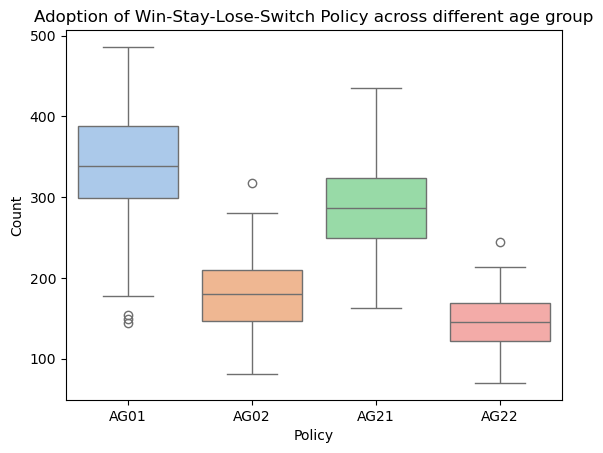

In [57]:
#Visualize Win-Stay-Lose-Switch by age group

#Initating Empty Lists to House Data from Each Age Group
AG01, AG21, AG02, AG21 = [], [], [], [] #AG0/2 = Age group 0/2 #01 = win-stay-lose-switch #02 = win-switch-lose-stay


AG01 = wsls_df.loc[wsls_df['Age_Groups'] == 0, 'Win_Stay_Lose_Switch'].tolist()
AG21 = wsls_df.loc[wsls_df['Age_Groups'] == 2, 'Win_Stay_Lose_Switch'].tolist()
AG02 = wsls_df.loc[wsls_df['Age_Groups'] == 0, 'Win_Switch_Lose_Stay'].tolist()
AG22 = wsls_df.loc[wsls_df['Age_Groups'] == 2, 'Win_Switch_Lose_Stay'].tolist()

#Combine the four plots into a DataFrame
wsls_AG_boxplot_df = pd.DataFrame({
    'Count' : list(AG01) + list(AG02) + list(AG21) + list(AG22),
    'Policy' : (['AG01'] * len(AG01)) + (['AG02'] * len(AG02)) + (['AG21'] * len(AG21)) + (['AG22'] * len(AG22))

})

sns.boxplot(x='Policy', y = 'Count', data=wsls_AG_boxplot_df, palette = palette).set(title='Adoption of Win-Stay-Lose-Switch Policy across different age group')



/var/folders/nn/5m7xhsdj28g92vn5kdvwz0680000gn/T/ipykernel_88949/3292886750.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Policy', y = 'Count', data=wsls_AG_boxplot_df, palette = palette).set(title='Adoption of Win-Stay-Lose-Switch Policy across different sex')
/var/folders/nn/5m7xhsdj28g92vn5kdvwz0680000gn/T/ipykernel_88949/3292886750.py:19: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.boxplot(x='Policy', y = 'Count', data=wsls_AG_boxplot_df, palette = palette).set(title='Adoption of Win-Stay-Lose-Switch Policy across different sex')


[Text(0.5, 1.0, 'Adoption of Win-Stay-Lose-Switch Policy across different sex')]

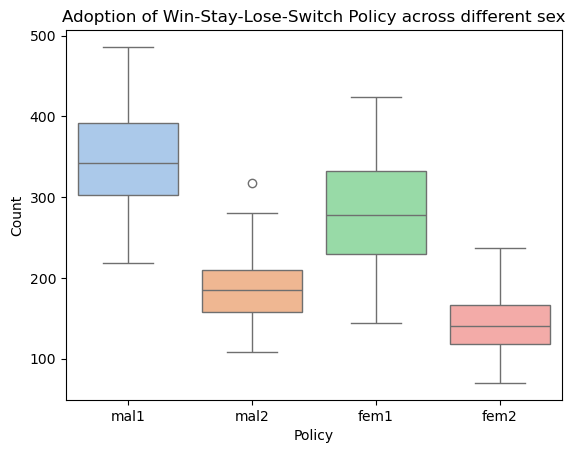

In [60]:
#Visualize Win-Stay-Lose-Switch by sex

#Initating Empty Lists to House Data from Each Age Group
mal1, fem1, mal2, fem2= [],[],[],[] #mal/fem = sex(male/Female) #01 = win-stay-lose-switch #02 = win-switch-lose-stay


mal1 = wsls_df.loc[wsls_df['Sex'] == 'male', 'Win_Stay_Lose_Switch'].tolist()
fem1 = wsls_df.loc[wsls_df['Sex'] == 'female', 'Win_Stay_Lose_Switch'].tolist()
mal2 = wsls_df.loc[wsls_df['Sex'] == 'male', 'Win_Switch_Lose_Stay'].tolist()
fem2 = wsls_df.loc[wsls_df['Sex'] == 'female', 'Win_Switch_Lose_Stay'].tolist()

#Combine the four plots into a DataFrame
wsls_AG_boxplot_df = pd.DataFrame({
    'Count' : list(mal1) + list(mal2) + list(fem1) + list(fem2),
    'Policy' : (['mal1'] * len(mal1)) + (['mal2'] * len(mal2)) + (['fem1'] * len(fem1)) + (['fem2'] * len(fem2))

})

sns.boxplot(x='Policy', y = 'Count', data=wsls_AG_boxplot_df, palette = palette).set(title='Adoption of Win-Stay-Lose-Switch Policy across different sex')




/var/folders/nn/5m7xhsdj28g92vn5kdvwz0680000gn/T/ipykernel_88949/1827453204.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Policy', y = 'Count', data=wsls_boxplot_df, palette=custom_palette).set(title='Extent to Which Mouse Adopt Win-Stay-Lose-Switch Policy')


[Text(0.5, 1.0, 'Extent to Which Mouse Adopt Win-Stay-Lose-Switch Policy')]

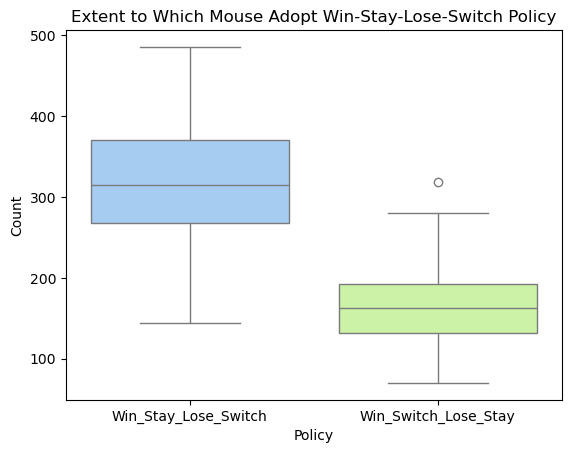

In [13]:
#Visualize Win-Stay-Lose-swtich data

win_stay_lose_switch_stats = []
win_switch_lose_stay_stats = []
win_stay_lose_switch_stats = wsls_df['Win_Stay_Lose_Switch']
win_switch_lose_stay_stats = wsls_df['Win_Switch_Lose_Stay']
#print(f'wsls1: {win_switch_lose_stay_stats}')
#print(f'wsls2: {win_stay_lose_switch_stats}')

#Combine two plots into a DataFrame
wsls_boxplot_df = pd.DataFrame({
    'Count': list(win_stay_lose_switch_stats) + list(win_switch_lose_stay_stats),
    'Policy': (['Win_Stay_Lose_Switch'] * len(win_stay_lose_switch_stats)) + (['Win_Switch_Lose_Stay'] * len(win_switch_lose_stay_stats))

})



sns.boxplot(x='Policy', y = 'Count', data=wsls_boxplot_df, palette=custom_palette).set(title='Extent to Which Mouse Adopt Win-Stay-Lose-Switch Policy')





# Fitting a Logistical Regression Model for the behavioral data under the Win-Stay-Lose_Switch Paradigm #

In [14]:
test_wsls = data_df[data_df['Session_ID'] == "YC1N_Session5"]

print(test_wsls[['Reward','Prev_Reward','Switch']])

     Reward  Prev_Reward  Switch
0         0            0       0
1         0            0       0
2         1            0       1
3         1            1       1
4         1            1       0
..      ...          ...     ...
482       0            0       0
483       0            0       0
484       0            0       0
485       0            0       1
486       1            0       0

[487 rows x 3 columns]


In [15]:
#Define New Column in the data frame 'Stay'

data_df['Stay'] = 1 - data_df['Switch']

print(data_df[['Switch','Stay']])

       Switch  Stay
0           0     1
1           0     1
2           1     0
3           1     0
4           0     1
...       ...   ...
90639       0     1
90640       0     1
90641       0     1
90642       0     1
90643       0     1

[90644 rows x 2 columns]


## Using cross_val_score helper function ##

In [16]:
#Modeling the behavioral data under the "Win-Stay-Lose-Swtich Paradigm"
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data_df['Prev_Reward'].values.reshape(-1, 1)
Y = data_df['Stay']

model = LogisticRegression()
model.fit(X, Y)

print("Coefficient:", model.coef_[0][0]) 
print("Intercept:", model.intercept_[0], "#Log-odds when Prev_Reward = 1")



Coefficient: 1.7923377920315569
Intercept: 1.1058313857932833 #Log-odds when Prev_Reward = 1


In [17]:
#K-fold Cross Validation
from sklearn.model_selection import cross_val_score

model = LogisticRegression()

scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')

print("Cross-validated accuracy scores:", scores)
print("Average CV accuracy:", scores.mean())

Cross-validated accuracy scores: [0.86618126 0.86618126 0.86618126 0.86618126 0.86617387]
Average CV accuracy: 0.8661797801740269


In [18]:
#Use GroupKFold to group behavioral data from the same mouse in the same fold to prevent leakage

from sklearn.model_selection import GroupKFold

groups = data_df['Session_ID']

gkf = GroupKFold(n_splits=5)

#Initialize and Calculate scores
#scores = []
scores = cross_val_score(LogisticRegression(), X, Y, cv=gkf.split(X, Y, groups))

print(f"Group Aware Cross Validation Score: {np.mean(scores):.3f} ± {np.std(scores):.3f}")


Group Aware Cross Validation Score: 0.866 ± 0.010


## Using train_test_split helper function ##

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Load data from dataframe
X = data_df['Prev_Reward'].values.reshape(-1, 1)
y = data_df['Stay']

#Split the data into train and test splits (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

'''
#Perform Cross-Validation using Training set only
model = LogisticRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross validated Train Score: {cv_scores}")
print(f"Mean Train CV Score: {np.mean(cv_scores)}")
'''

#Train on each using training set
model.fit(X_train, y_train)
print(f'Regression Coefficient: {model.coef_[0] [0]}')

#Test on untouched testing set
test_accuracy = model.score(X_test,y_test)
print(f'Test Accuracy: {test_accuracy}')




Regression Coefficient: 1.7939494254926371
Test Accuracy: 0.8696011914611947


## Employing GridSearchCV instead of cross_val_score ##

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Load data from dataframe
X = data_df['Prev_Reward'].values.reshape(-1, 1)
y = data_df['Stay']

#Split the data into train and test splits (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

#Defining Grid Parameters
param_grid = {
    'C': [0.01, 0.1, 0, 10, 100]
}

#Tuning the Hyperparameter
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5, scoring='accuracy')
grid.fit(X_train, y_train)

#Best Model Hyperparameter
print(f'Best model parameter: {grid.best_params_}')

#Evaluate using untouched test sets
print(f'Test Accuracy: {grid.score(X_test, y_test)}')

Best model parameter: {'C': 0.01}
Test Accuracy: 0.8696011914611947


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-packag

# Log-Odds of Current Trial Given Previous 3 Reward History #

**Calculating Log-odds from probability**
$$
\text{logit}(p) = \ln\left( \frac{p}{1-p} \right)
$$

**Calculating probability from log-odds**
$$
p = \frac{1}{1 + e^{-x}}
$$


In [61]:
#Test

prev3reward = pd.DataFrame(data_df[['Reward','1_Reward','2_Reward','3_Reward']])

print(prev3reward.head())

   Reward  1_Reward  2_Reward  3_Reward
0       0         1         1         1
1       0         0         1         1
2       1         0         0         1
3       1         1         0         0
4       1         1         1         0


In [66]:
#Last three Pre_Reward's impact on Current Decision

#Define log-odds list
rew_coef = []

#Import data
X_3reward = prev3reward[['1_Reward','2_Reward','3_Reward']]
Y = data_df['Stay']

#Spliting into training and testing data 80/20%
X_train, X_test, y_train, y_test = train_test_split(X_3reward, Y, test_size=0.2, random_state= 42)

#Run Logistical Regression
model = LogisticRegression()
model.fit(X_train, y_train)

#Validation Using Testing Sets
test_accuracy = model.score(X_test,y_test)
print(f'Test Accuracy: {test_accuracy}')

#Define Feasture name
feature_name = ['1_Reward','2_Reward','3_Reward']


for name, coef in zip(feature_name, model.coef_[0]):
    print(f"{name},Regression Coeficient:{coef}")
    rew_coef.append(coef)

print('Intercept:',model.intercept_[0])
print(rew_coef)


Test Accuracy: 0.8696011914611947
1_Reward,Regression Coeficient:1.6680546628476616
2_Reward,Regression Coeficient:0.49662500149073285
3_Reward,Regression Coeficient:0.19052154808440205
Intercept: 0.7978496048842044
[1.6680546628476616, 0.49662500149073285, 0.19052154808440205]


[Text(0.5, 1.0, 'Log-Odds vs Reward History')]

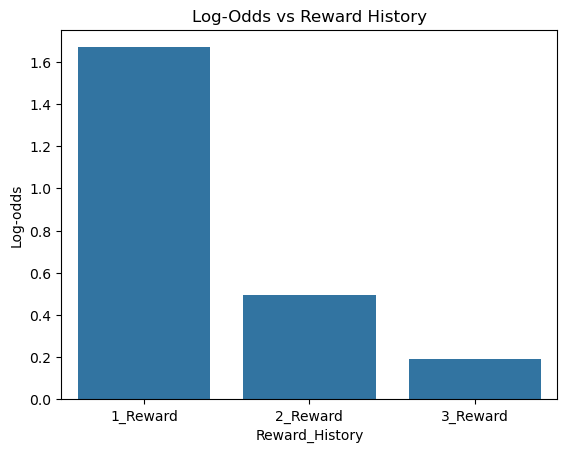

In [75]:
#Ploting log-odds VS. Reward History

log_odds_vs_rew_his = pd.DataFrame({
    'Reward_History' : ['1_Reward','2_Reward','3_Reward'],
    'Log-odds' : rew_coef
})

sns.barplot(x='Reward_History',y='Log-odds', data=log_odds_vs_rew_his).set(title='Log-Odds vs Reward History')



In [80]:
#Calculating the Odds-ratio

odds_ratio = []

odds_ratio = [np.exp(i) for i in (rew_coef)]

print('1_Reward:',odds_ratio[0])
print('2_Reward:',odds_ratio[1])
print('3_Reward:',odds_ratio[2])

1_Reward: 5.301843884806767
2_Reward: 1.6431662182890756
3_Reward: 1.2098804439625148


## Log-odds for previous 5 Trials ##

In [97]:
#Test

prev5reward = pd.DataFrame(clean_prev_df[['Reward','Prev_Reward_1','Prev_Reward_2','Prev_Reward_3','Prev_Reward_4','Prev_Reward_5']])

print(prev5reward.head())

   Reward  Prev_Reward_1  Prev_Reward_2  Prev_Reward_3  Prev_Reward_4  \
5       1              1              1              1              0   
6       1              1              1              1              1   
7       1              1              1              1              1   
8       0              1              1              1              1   
9       0              0              1              1              1   

   Prev_Reward_5  
5              0  
6              0  
7              1  
8              1  
9              1  


In [98]:
#Last three Pre_Reward's impact on Current Decision

#Define log-odds list
rew_coef_5 = []

#Import data
X_5reward = prev5reward[['Prev_Reward_1','Prev_Reward_2','Prev_Reward_3','Prev_Reward_4','Prev_Reward_5']]
Y = clean_prev_df['Stay']

#Spliting into training and testing data 80/20%
X_train, X_test, y_train, y_test = train_test_split(X_5reward, Y, test_size=0.2, random_state= 42)

#Run Logistical Regression
model = LogisticRegression()
model.fit(X_train, y_train)

#Validation Using Testing Sets
test_accuracy = model.score(X_test,y_test)
print(f'Test Accuracy: {test_accuracy}')

#Define Feasture name
feature_name = ['Prev_Reward_1','Prev_Reward_2','Prev_Reward_3','Prev_Reward_4','Prev_Reward_5']


for name, coef in zip(feature_name, model.coef_[0]):
    print(f"{name},Regression Coeficient:{coef}")
    rew_coef_5.append(coef)

print('Intercept:',model.intercept_[0])
print(rew_coef_5)


Test Accuracy: 0.8654960981047938
Prev_Reward_1,Regression Coeficient:1.669267919047847
Prev_Reward_2,Regression Coeficient:0.48267015135160696
Prev_Reward_3,Regression Coeficient:0.155974976286323
Prev_Reward_4,Regression Coeficient:0.09346454294636117
Prev_Reward_5,Regression Coeficient:0.05337434899844232
Intercept: 0.7583638367629508
[1.669267919047847, 0.48267015135160696, 0.155974976286323, 0.09346454294636117, 0.05337434899844232]


[Text(0.5, 1.0, 'Log-Odds vs Reward History')]

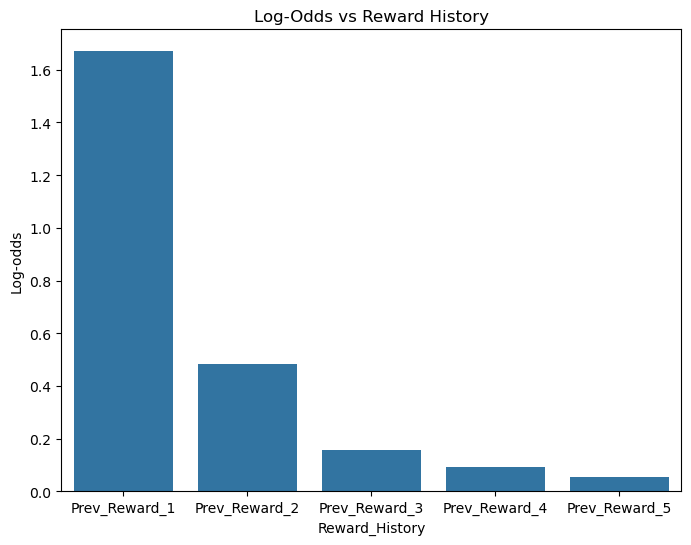

In [100]:
import matplotlib.pyplot as plt

#Ploting log-odds VS. Reward History

log_odds_vs_rew_his = pd.DataFrame({
    'Reward_History' : ['Prev_Reward_1','Prev_Reward_2','Prev_Reward_3','Prev_Reward_4','Prev_Reward_5'],
    'Log-odds' : rew_coef_5
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Reward_History',y='Log-odds', data=log_odds_vs_rew_his).set(title='Log-Odds vs Reward History')



In [101]:
#Calculating the Odds-ratio

odds_ratio = []

odds_ratio = [np.exp(i) for i in (rew_coef_5)]

print('Prev_Reward_1:',odds_ratio[0])
print('Prev_Reward_2:',odds_ratio[1])
print('Prev_Reward_3:',odds_ratio[2])
print('Prev_Reward_4:',odds_ratio[3])
print('Prev_Reward_5:',odds_ratio[4])

Prev_Reward_1: 5.308280283483199
Prev_Reward_2: 1.6203953316427646
Prev_Reward_3: 1.1687969550835733
Prev_Reward_4: 1.0979716718106436
Prev_Reward_5: 1.054824443692549


## Verifying the Exponential Decay of Log-odds with time ##

In [ ]:
# Variables we are working with
print(feature_name, rew_coef)

['1_Reward', '2_Reward', '3_Reward'] [1.6680546628476616, 0.49662500149073285, 0.19052154808440205]


**Exponential Decay Equation**
$$
\beta_k = A \cdot e^{-k / \tau}
$$

**Fitting Exponential Decay Model on Previous Three Trial Data**

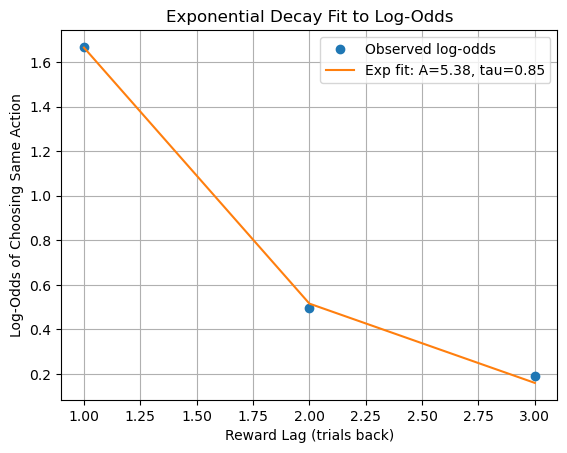

MSE of exponential fit: 0.00044048079011230196


In [86]:
# Fitting an exponential model for the Log-odds decay
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

his = np.array([1, 2, 3])



#Define Exponential Deay function
def exponential_decay(k, A, tau):
    return A * np.exp(-k/tau)

#Fit Curve
params, _ = curve_fit(exponential_decay , his, rew_coef, p0=[rew_coef[0], 1])
A_fit, tau_fit = params

# Predicted values
log_odds_fit = exponential_decay(his, A_fit, tau_fit)

# Plotting
plt.plot(his, rew_coef, 'o', label='Observed log-odds')
plt.plot(his, log_odds_fit, '-', label=f'Exp fit: A={A_fit:.2f}, tau={tau_fit:.2f}')
plt.xlabel('Reward Lag (trials back)')
plt.ylabel('Log-Odds of Choosing Same Action')
plt.legend()
plt.title('Exponential Decay Fit to Log-Odds')
plt.grid(True)
plt.show()

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(rew_coef, log_odds_fit)
print("MSE of exponential fit:", mse)


**Cleaning Data，avoid unwanted boundary effects**

In [ ]:
#Prevent the first trials in each session to display errorneous Previous Reward data

data_df['Prev_Reward_1']  = data_df['Prev_Reward']
data_df['Prev_Reward_2'] = data_df['Prev_Reward_1'].shift(1).fillna(0)
data_df['Prev_Reward_3'] = data_df['Prev_Reward_2'].shift(1).fillna(0)
data_df['Prev_Reward_4'] = data_df['Prev_Reward_3'].shift(1).fillna(0)
data_df['Prev_Reward_5'] = data_df['Prev_Reward_4'].shift(1).fillna(0)

for session in unique_mouse_sessions:
    
    idx =data_df[data_df['Session_ID'] == session].index
    #Clear First 'n' row(s) of Pre_Reward_n,
    data_df.loc[idx[0],['Prev_Reward_1']] = np.nan
    data_df.loc[idx[:2],['Prev_Reward_2']] = np.nan
    data_df.loc[idx[:3],['Prev_Reward_3']] = np.nan
    data_df.loc[idx[:4],['Prev_Reward_4']] = np.nan
    data_df.loc[idx[:5],['Prev_Reward_5']] = np.nan
    
    
    #print(data_df[['Reward','Prev_Reward','Prev_Reward_1','Prev_Reward_2','Prev_Reward_3']].head())

    
    
    #filter_session = data_df[data_df['Session_ID'] == session]
    #print(filter_session.head())
    #filter_session['Pre_Reward_1'].iloc[0].clear
    #filter_session['Pre_Reward_1'].iloc[:1].clear
    #filter_session['Pre_Reward_1'].iloc[:2].clear
    #data_df['Session_ID' == session]['Prev_Reward_1','Prev_Reward_2','Prev_Reward_3'] = filter_session['Prev_Reward_1','Prev_Reward_1','Prev_Reward_1']

#Conveting the float data into integers, after applying np.nan operation to the first rows in each session
data_df['Prev_Reward_1'] = data_df['Prev_Reward_1'].astype('Int64')
data_df['Prev_Reward_2'] = data_df['Prev_Reward_2'].astype('Int64')
data_df['Prev_Reward_3'] = data_df['Prev_Reward_3'].astype('Int64')
data_df['Prev_Reward_4'] = data_df['Prev_Reward_4'].astype('Int64')
data_df['Prev_Reward_5'] = data_df['Prev_Reward_5'].astype('Int64')

print(data_df[['Reward','Prev_Reward','Prev_Reward_1','Prev_Reward_2','Prev_Reward_3','Prev_Reward_4','Prev_Reward_5']].head)

#Remove rows with <NA>
clean_prev_df = data_df.dropna(subset=['Reward','Prev_Reward','Prev_Reward_1','Prev_Reward_2','Prev_Reward_3','Prev_Reward_4','Prev_Reward_5'])

clean_prev_df


<bound method NDFrame.head of        Reward  Prev_Reward  Prev_Reward_1  Prev_Reward_2  Prev_Reward_3  \
0           0            0           <NA>           <NA>           <NA>   
1           0            0              0           <NA>           <NA>   
2           1            0              0              0           <NA>   
3           1            1              1              0              0   
4           1            1              1              1              0   
...       ...          ...            ...            ...            ...   
90639       1            1              1              1              1   
90640       1            1              1              1              1   
90641       1            1              1              1              1   
90642       1            1              1              1              1   
90643       1            1              1              1              1   

       Prev_Reward_4  Prev_Reward_5  
0               <NA>           

,Mouse,Age_Groups,Trial,blockTrial,0_ITI,0_trialDuration,Decision,1_Port,1_Reward,1_ITI,...,Session_ID,lose_switch,win-stay,Prev_Reward,Stay,Prev_Reward_1,Prev_Reward_2,Prev_Reward_3,Prev_Reward_4,Prev_Reward_5
5,YC1N,0,9,9,2.517,0.348,0,0,1,1.847,...,YC1N_Session5,0,0,1,1,1,1,1,0,0
6,YC1N,0,10,10,3.451,0.524,0,0,1,2.517,...,YC1N_Session5,0,0,1,1,1,1,1,1,0
7,YC1N,0,11,11,1.668,0.411,0,0,1,3.451,...,YC1N_Session5,0,0,1,1,1,1,1,1,1
8,YC1N,0,12,12,1.694,0.444,1,0,1,1.668,...,YC1N_Session5,0,0,1,0,1,1,1,1,1
9,YC1N,0,13,13,1.272,0.397,1,1,0,1.694,...,YC1N_Session5,0,0,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90639,YC8B,0,524,6,2.145,0.263,1,1,1,1.594,...,YC8B_Session10,0,0,1,1,1,1,1,1,1
90640,YC8B,0,525,7,1.690,0.313,1,1,1,2.145,...,YC8B_Session10,0,0,1,1,1,1,1,1,1
90641,YC8B,0,526,8,1.579,0.323,1,1,1,1.690,...,YC8B_Session10,0,0,1,1,1,1,1,1,1
90642,YC8B,0,527,9,1.659,0.352,1,1,1,1.579,...,YC8B_Session10,0,0,1,1,1,1,1,1,1


**Re-fitting the Exponential Decay Model Using Clean Dataframe and Previous 5 Trials**

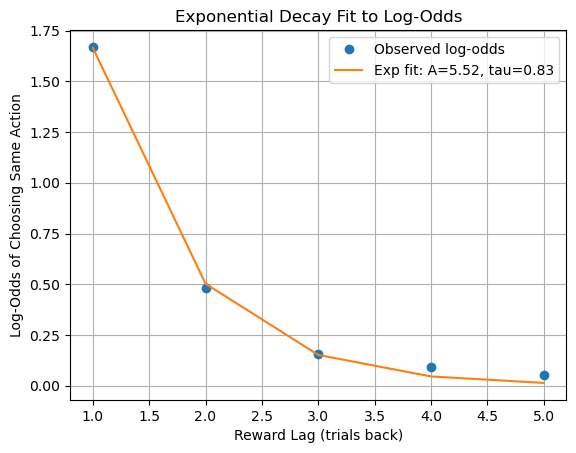

MSE of exponential fit: 0.0008539702330802601
R^2 of exponential fit: 0.9976921932433859


In [ ]:
# Fitting an exponential model for the Log-odds decay (Previous 5 Trials, and w/ clean dataframe)
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

#History feature names
his = np.array([1, 2, 3, 4, 5])

#Define Exponential Deay function
def exponential_decay(k, A, tau):
    return A * np.exp(-k/tau)

#Fit Curve
params, _ = curve_fit(exponential_decay , his, rew_coef_5, p0=[rew_coef[0], 1])
A_fit, tau_fit = params

# Predicted values
log_odds_fit = exponential_decay(his, A_fit, tau_fit)

# Plotting
plt.plot(his, rew_coef_5, 'o', label='Observed log-odds')
plt.plot(his, log_odds_fit, '-', label=f'Exp fit: A={A_fit:.2f}, tau={tau_fit:.2f}')
plt.xlabel('Reward Lag (trials back)')
plt.ylabel('Log-Odds of Choosing Same Action')
plt.legend()
plt.title('Exponential Decay Fit to Log-Odds')
plt.grid(True)
plt.show()


#Validify Using Mean Square Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(rew_coef_5, log_odds_fit)
print("MSE of exponential fit:", mse)

#Validigy Using R Square
from sklearn.metrics import r2_score
# Calculate R^2
r2 = r2_score(rew_coef_5, log_odds_fit)
print("R^2 of exponential fit:", r2)


## Modeling Log-odds with Respect to Reward History ##

In [122]:
#Slicing the dataframe into younger and older

younger_df = clean_prev_df[clean_prev_df['Age_Groups'] == 0]
older_df = clean_prev_df[clean_prev_df['Age_Groups'] == 2]


print(younger_df['Age_Groups'].unique())

print(older_df['Age_Groups'].unique())

[0]
[2]


In [123]:
younger_df

,Mouse,Age_Groups,Trial,blockTrial,0_ITI,0_trialDuration,Decision,1_Port,1_Reward,1_ITI,...,Session_ID,lose_switch,win-stay,Prev_Reward,Stay,Prev_Reward_1,Prev_Reward_2,Prev_Reward_3,Prev_Reward_4,Prev_Reward_5
5,YC1N,0,9,9,2.517,0.348,0,0,1,1.847,...,YC1N_Session5,0,0,1,1,1,1,1,0,0
6,YC1N,0,10,10,3.451,0.524,0,0,1,2.517,...,YC1N_Session5,0,0,1,1,1,1,1,1,0
7,YC1N,0,11,11,1.668,0.411,0,0,1,3.451,...,YC1N_Session5,0,0,1,1,1,1,1,1,1
8,YC1N,0,12,12,1.694,0.444,1,0,1,1.668,...,YC1N_Session5,0,0,1,0,1,1,1,1,1
9,YC1N,0,13,13,1.272,0.397,1,1,0,1.694,...,YC1N_Session5,0,0,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90639,YC8B,0,524,6,2.145,0.263,1,1,1,1.594,...,YC8B_Session10,0,0,1,1,1,1,1,1,1
90640,YC8B,0,525,7,1.690,0.313,1,1,1,2.145,...,YC8B_Session10,0,0,1,1,1,1,1,1,1
90641,YC8B,0,526,8,1.579,0.323,1,1,1,1.690,...,YC8B_Session10,0,0,1,1,1,1,1,1,1
90642,YC8B,0,527,9,1.659,0.352,1,1,1,1.579,...,YC8B_Session10,0,0,1,1,1,1,1,1,1


In [124]:
older_df

,Mouse,Age_Groups,Trial,blockTrial,0_ITI,0_trialDuration,Decision,1_Port,1_Reward,1_ITI,...,Session_ID,lose_switch,win-stay,Prev_Reward,Stay,Prev_Reward_1,Prev_Reward_2,Prev_Reward_3,Prev_Reward_4,Prev_Reward_5
20846,YC3N,2,9,9,1.321,0.301,0,0,1,1.295,...,YC3N_Session5,0,0,1,1,1,1,1,1,0
20847,YC3N,2,10,10,1.513,0.313,0,0,1,1.321,...,YC3N_Session5,0,0,1,1,1,1,1,1,1
20848,YC3N,2,11,11,1.452,0.281,0,0,0,1.513,...,YC3N_Session5,0,0,0,1,0,1,1,1,1
20849,YC3N,2,12,12,1.658,0.293,0,0,1,1.452,...,YC3N_Session5,0,0,1,1,1,0,1,1,1
20850,YC3N,2,13,13,1.251,0.291,0,0,1,1.658,...,YC3N_Session5,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62089,YC6B,2,437,8,1.314,0.327,0,0,0,1.473,...,YC6B_Session10,0,0,0,1,0,1,1,1,0
62090,YC6B,2,438,9,14.285,0.384,0,0,0,1.314,...,YC6B_Session10,0,0,0,1,0,0,1,1,1
62091,YC6B,2,439,10,13.183,0.345,0,0,0,14.285,...,YC6B_Session10,0,0,0,1,0,0,0,1,1
62092,YC6B,2,440,11,13.350,0.363,0,0,0,13.183,...,YC6B_Session10,0,0,0,1,0,0,0,0,1


**Performing Logistical Regression**

In [126]:
#Extracting Previous Reward Data
prev5reward_younger = pd.DataFrame(younger_df[['Reward','Prev_Reward_1','Prev_Reward_2','Prev_Reward_3','Prev_Reward_4','Prev_Reward_5']])

print(len(prev5reward_younger))

prev5reward_older = pd.DataFrame(older_df[['Reward','Prev_Reward_1','Prev_Reward_2','Prev_Reward_3','Prev_Reward_4','Prev_Reward_5']])

print(len(prev5reward_older))


48916
40783


In [137]:
#Last three Pre_Reward's impact on Current Decision

#Define Feasture name
feature_name = ['Prev_Reward_1','Prev_Reward_2','Prev_Reward_3','Prev_Reward_4','Prev_Reward_5']

#Define log-odds list
rew_coef_5_young = []
rew_coef_5_old = []



#Younger
#Import data
X_5reward_younger = younger_df[['Prev_Reward_1','Prev_Reward_2','Prev_Reward_3','Prev_Reward_4','Prev_Reward_5']]
Y = younger_df['Stay']

#Spliting into training and testing data 80/20%
X_train, X_test, y_train, y_test = train_test_split(X_5reward_younger, Y, test_size=0.2, random_state= 42)

#Run Logistical Regression
model = LogisticRegression()
model.fit(X_train, y_train)

#Validation Using Testing Sets
test_accuracy = model.score(X_test,y_test)

#Younger Results
print('Younger(AG = 0):')
print(f'Test Accuracy: {test_accuracy}')

for name, coef in zip(feature_name, model.coef_[0]):
    print(f"{name},Regression Coeficient:{coef}")
    rew_coef_5_young.append(coef)

print('Intercept:',model.intercept_[0])
print(rew_coef_5_young)




#older
#Import data
X_5reward_older = older_df[['Prev_Reward_1','Prev_Reward_2','Prev_Reward_3','Prev_Reward_4','Prev_Reward_5']]
Y = older_df['Stay']

#Spliting into training and testing data 80/20%
X_train, X_test, y_train, y_test = train_test_split(X_5reward_older, Y, test_size=0.2, random_state= 42)

#Run Logistical Regression
model = LogisticRegression()
model.fit(X_train, y_train)

#Validation Using Testing Sets
test_accuracy = model.score(X_test,y_test)

#Older Results
print('older(AG = 2):')
print(f'Test Accuracy: {test_accuracy}')

for name, coef in zip(feature_name, model.coef_[0]):
    print(f"{name},Regression Coeficient:{coef}")
    rew_coef_5_old.append(coef)

print('Intercept:',model.intercept_[0])
print(rew_coef_5_old)



Younger(AG = 0):
Test Accuracy: 0.8769419460343418
Prev_Reward_1,Regression Coeficient:1.7013591186462889
Prev_Reward_2,Regression Coeficient:0.5132583018141204
Prev_Reward_3,Regression Coeficient:0.08779129616231916
Prev_Reward_4,Regression Coeficient:0.15163529658793393
Prev_Reward_5,Regression Coeficient:0.06506149645259392
Intercept: 0.8624808526392816
[1.7013591186462889, 0.5132583018141204, 0.08779129616231916, 0.15163529658793393, 0.06506149645259392]
older(AG = 2):
Test Accuracy: 0.8576682603898492
Prev_Reward_1,Regression Coeficient:1.6314324808573732
Prev_Reward_2,Regression Coeficient:0.5155417366569518
Prev_Reward_3,Regression Coeficient:0.20558647902457997
Prev_Reward_4,Regression Coeficient:0.0047607085574864405
Prev_Reward_5,Regression Coeficient:0.05068763656683842
Intercept: 0.6210489056813934
[1.6314324808573732, 0.5155417366569518, 0.20558647902457997, 0.0047607085574864405, 0.05068763656683842]


**Plotting Old Vs Young (Previous Rewards' impact on log-odds)**

In [130]:
# Defining Two-colored color palette

color_palette_2 = ["#1f77b4", "#ff7f0e"]

[1.7013591186462889, 1.6314324808573732, 0.5132583018141204, 0.5155417366569518, 0.08779129616231916, 0.20558647902457997, 0.15163529658793393, 0.0047607085574864405, 0.06506149645259392, 0.05068763656683842]


/var/folders/nn/5m7xhsdj28g92vn5kdvwz0680000gn/T/ipykernel_88949/2409632286.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reward_History',y='Log-odds', data=log_odds_vs_rew_his, palette=color_palette_2).set(title='Log-Odds vs Reward History')
/var/folders/nn/5m7xhsdj28g92vn5kdvwz0680000gn/T/ipykernel_88949/2409632286.py:23: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Reward_History',y='Log-odds', data=log_odds_vs_rew_his, palette=color_palette_2).set(title='Log-Odds vs Reward History')


[Text(0.5, 1.0, 'Log-Odds vs Reward History')]

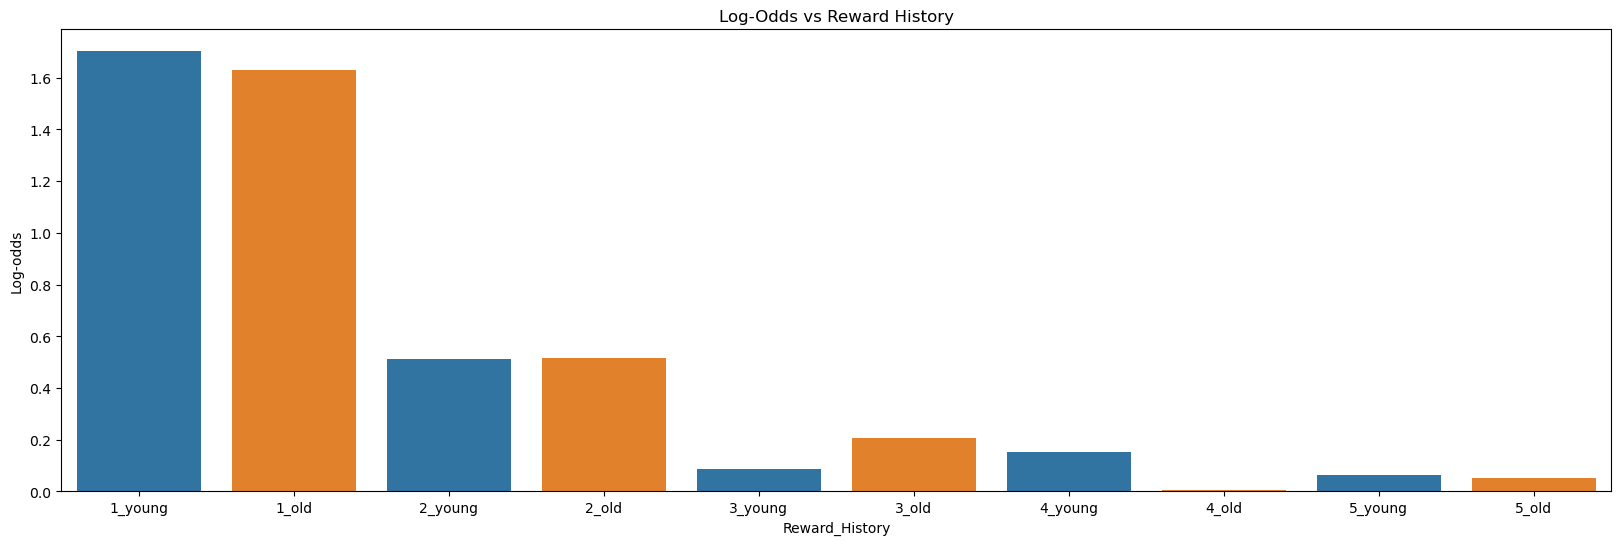

In [138]:
import matplotlib.pyplot as plt

#Initialize rew_coef
rew_coef = []


#Combine two Coefficient array
for i in range(0, 5):
    rew_coef.append(rew_coef_5_young[i])
    rew_coef.append(rew_coef_5_old[i])

print(rew_coef)


#Ploting log-odds VS. Reward History

log_odds_vs_rew_his = pd.DataFrame({
    'Reward_History' : ['1_young','1_old','2_young','2_old','3_young','3_old','4_young','4_old','5_young','5_old'],
    'Log-odds' : rew_coef
})

plt.figure(figsize=(20, 6))
sns.barplot(x='Reward_History',y='Log-odds', data=log_odds_vs_rew_his, palette=color_palette_2).set(title='Log-Odds vs Reward History')



# Investiagting Previous Reward's Impact on Decision Time #

In [73]:
#Determining whether the decision time data is skewed
data_df['0_trialDuration'].skew()

29.932018277773583

In [74]:
#Since the trial duration is heavily skewed, we apply log transform, to normalize the data
data_df['log_TD'] = np.log(data_df['0_trialDuration'])

In [86]:
#Mean Trial Duration
data_df['0_trialDuration'].mean()

0.34116563699748464

In [77]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression

X = data_df[['1_Reward']]
Y = data_df['log_TD']

model = LinearRegression()
model.fit(X, Y)

print('Regression Coefficient:', model.coef_[0])
print('Intercept:', model.intercept_)

Regression Coefficient: -0.08898165896446673
Intercept: -1.0718114131804923


In [85]:
data_df[['Decision','1_Port','2_Port']].iloc[:20]

,Decision,1_Port,2_Port
0,0,0,0
1,0,0,0
2,1,0,0
3,0,1,0
4,0,0,1
5,0,0,0
6,0,0,0
7,0,0,0
8,1,0,0
9,1,1,0


In [ ]:
#Conflicting Experience's Impact on Decision Time

#Constructing a column for trials where for both of the previous two trials the mouse chose right-side
data_df['RR'] = (data_df['1_Port'] +data_df['2_Port'] == 2).astype(int)

#Constructing a column for trials where for both of the previous two trials the mouse chose left-side
data_df['LL'] = (data_df['1_Port'] +data_df['2_Port'] == 0).astype(int)


#Printing the first 20 trials to ensure my RR and LL data is correct
print(data_df[["RR","LL","1_Port","2_Port"]].iloc[:20])



    RR  LL  1_Port  2_Port
0    0   1       0       0
1    0   1       0       0
2    0   1       0       0
3    0   0       1       0
4    0   0       0       1
5    0   1       0       0
6    0   1       0       0
7    0   1       0       0
8    0   1       0       0
9    0   0       1       0
10   1   0       1       1
11   1   0       1       1
12   1   0       1       1
13   1   0       1       1
14   1   0       1       1
15   1   0       1       1
16   0   0       0       1
17   0   1       0       0
18   0   1       0       0
19   0   0       1       0


In [ ]:
#Conflicting Experience's Impact on Decision Time

#Right-Win-Right-Lose
data_df['RWRL'] = ((data_df['RR'] == 1) & (data_df['Reward'] == 0) & (data_df['1_Reward'] == 1)).astype(int) # More discussion needed
#data_df['RWRL'] = ((data_df['RR'] == 1) & (data_df['1_Reward'] == 0) & (data_df['2_Reward'] == 1)).astype(int)

#Left-Win-Left-Lose
data_df['LWLL'] = ((data_df['LL'] == 1) & (data_df['Reward'] == 0) & (data_df['Reward'] == 1)).astype(int) # More discussion needed
#data_df['LWLL'] = ((data_df['LL'] == 1) & (data_df['1_Reward'] == 0) & (data_df['2_Reward'] == 1)).astype(int)

#Initial Approach
#data_df['2_Conflict_TD'] = data_df['0_trialDuration'] in ((data_df['RWRL'] == 1) or (data_df['LWLL'] == 1))

# Initialize the column with NaN or 0
data_df['2_Conflict_TD'] = np.nan

# Assign 0_trialDuration where RWRL or LWLL is 1
mask = (data_df['RWRL'] == 1) | (data_df['LWLL'] == 1)
data_df.loc[mask, '2_Conflict_TD'] = data_df.loc[mask, '0_trialDuration']


print(f'Mean TD after conflicting experience:{data_df['2_Conflict_TD'].mean()}')
print(f'Mean TD across all trials:{data_df['0_trialDuration'].mean()}')





Mean TD after conflicting experience:0.35127902934688143
Mean TD across all trials:0.34116563699748464


## Invesrtigating if the Log-odds for reward histories get effected by session numbers ##

In [145]:
clean_prev_df[['Mouse','Session_Number']]

,Mouse,Session_Number
5,YC1N,5
6,YC1N,5
7,YC1N,5
8,YC1N,5
9,YC1N,5
...,...,...
90639,YC8B,10
90640,YC8B,10
90641,YC8B,10
90642,YC8B,10


In [163]:
#Last Five Pre_Reward's impact on Current Decision

#Define dictionary that will store all the coefficients
rew_coef_session = {}

for session in range (5, 11):
    current_session_clean_df = clean_prev_df[clean_prev_df['Session_Number'] == session]
    #print(current_session_clean_df.Session_Number)

    #Define log-odds list
    rew_coef_5 = []

    #Import data
    X = current_session_clean_df[['Prev_Reward_1','Prev_Reward_2','Prev_Reward_3','Prev_Reward_4','Prev_Reward_5']]
    Y = current_session_clean_df['Stay']

    #Spliting into training and testing data 80/20%
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state= 42)

    #Run Logistical Regression
    model = LogisticRegression()
    model.fit(X_train, y_train)

    #Validation Using Testing Sets
    test_accuracy = model.score(X_test,y_test)
    print(f'Test Accuracy: {test_accuracy}')

    #Define Feasture name
    feature_name = ['Prev_Reward_1','Prev_Reward_2','Prev_Reward_3','Prev_Reward_4','Prev_Reward_5']


    for name, coef in zip(feature_name, model.coef_[0]):
        print(f"{name},Regression Coeficient:{coef}")
        rew_coef_5.append(coef)

    print('Intercept:',model.intercept_[0])
    print(rew_coef_5)

    rew_coef_session[f'Session{session}'] = rew_coef_5



print(rew_coef_session)




Test Accuracy: 0.8610013175230566
Prev_Reward_1,Regression Coeficient:1.6206676698862403
Prev_Reward_2,Regression Coeficient:0.4634350793867224
Prev_Reward_3,Regression Coeficient:0.17403406297169377
Prev_Reward_4,Regression Coeficient:0.0593160972493814
Prev_Reward_5,Regression Coeficient:0.03574829411699684
Intercept: 0.7853414672941482
[1.6206676698862403, 0.4634350793867224, 0.17403406297169377, 0.0593160972493814, 0.03574829411699684]
Test Accuracy: 0.8536421617992614
Prev_Reward_1,Regression Coeficient:1.5745678219274384
Prev_Reward_2,Regression Coeficient:0.4256722270885567
Prev_Reward_3,Regression Coeficient:0.18482256482451745
Prev_Reward_4,Regression Coeficient:0.059906344465296246
Prev_Reward_5,Regression Coeficient:0.06016338271107874
Intercept: 0.814755203385989
[1.5745678219274384, 0.4256722270885567, 0.18482256482451745, 0.059906344465296246, 0.06016338271107874]
Test Accuracy: 0.8543756485645105
Prev_Reward_1,Regression Coeficient:1.5815213722961772
Prev_Reward_2,Regres

In [155]:
#Customize Seaborn Color 

# Define a custom color palette using RGB values
palette = ["#a1c9f4", "#ffb482", "#8de5a1", "#ff9f9b", "#d0bbff"]

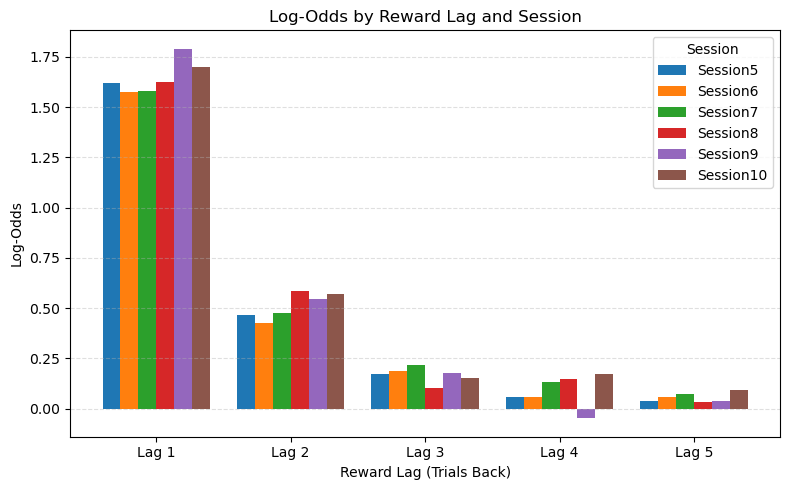

"\n#Ploting log-odds VS. Reward History\n\nlog_odds_vs_rew_his = pd.DataFrame({\n    'Reward_History' : ['Session5','Session6', 'Session7', 'Session8', 'Session9', 'Session10'],\n    'Log-odds' : rew_coef_session\n})\n\nplt.figure(figsize=(30, 6))\nsns.barplot(x='Reward_History',y='Log-odds', data=log_odds_vs_rew_his, palette=palette).set(title='Log-Odds by Session_Number')\n\n"

In [164]:
import matplotlib.pyplot as plt
import numpy as np

groups = list(rew_coef_session.keys())
n_groups = len(groups)
n_lags = len(next(iter(rew_coef_session.values())))

bar_width = 0.8 / n_groups
x = np.arange(n_lags)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

for i, group in enumerate(groups):
    y = rew_coef_session[group]  # y-values for this group
    offset = (i - n_groups / 2) * bar_width + bar_width / 2  # center align
    ax.bar(x + offset, y, width=bar_width, label=group)

#Customize
ax.set_xticks(x)
ax.set_xticklabels([f"Lag {i+1}" for i in x])
ax.set_xlabel("Reward Lag (Trials Back)")
ax.set_ylabel("Log-Odds")
ax.set_title("Log-Odds by Reward Lag and Session")
ax.legend(title="Session")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


'''
#Ploting log-odds VS. Reward History

log_odds_vs_rew_his = pd.DataFrame({
    'Reward_History' : ['Session5','Session6', 'Session7', 'Session8', 'Session9', 'Session10'],
    'Log-odds' : rew_coef_session
})

plt.figure(figsize=(30, 6))
sns.barplot(x='Reward_History',y='Log-odds', data=log_odds_vs_rew_his, palette=palette).set(title='Log-Odds by Session_Number')

'''